In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data = pd.read_csv('../data/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
data['predicted_proba'] = np.random.rand(data.shape[0])

In [13]:
data['predicted_proba'].describe()

count    891.000000
mean       0.506796
std        0.292783
min        0.000004
25%        0.252300
50%        0.520446
75%        0.754618
max        0.999992
Name: predicted_proba, dtype: float64

In [29]:
label = 'Survived'
threshold = 0.5
data['predicted'] = data['predicted_proba'] > threshold

# Accuracy
- $$ \frac{tp + tn}{tp+tn+fn+fp}$$

In [104]:
tp = ((data['predicted'] == 1) & (data[label] == 1)).sum()
fp = ((data['predicted'] == 1) & (data[label] == 0)).sum()
tn = ((data['predicted'] == 0) & (data[label] == 0)).sum()
fn = ((data['predicted'] == 0) & (data[label] == 1)).sum()

(tp+tn) / (tp+tn+fp+fn)

0.49158249158249157

In [39]:
acc = (data['predicted'] == data[label]).mean()
acc

0.49158249158249157

In [43]:
from sklearn.metrics import accuracy_score
y_true = data[label]
y_pred = data['predicted']
accuracy_score(y_true, y_pred)

0.49158249158249157

# Recall
- $$\frac{tp}{tp+fn}$$

In [32]:
tp = ((data['predicted']==1) & (data[label]==1)).sum()
fn = ((data['predicted']==0) & (data[label]==1)).sum()
recall = tp / (tp+fn)
recall

0.5175438596491229

In [35]:
from sklearn.metrics import recall_score
y_true = data[label]
y_pred = data['predicted']
recall_score(y_true, y_pred)

0.5175438596491229

In [50]:
def recall(y_true, y_pred):
    tp = ((y_true==1) & (y_pred==1)).sum()
    fn = ((y_true==1) & (y_pred==0)).sum()
    return tp / (tp+fn)
recall(y_true, y_pred)

0.5175438596491229

# Precision
- $$\frac{tp}{tp+fp}$$

In [28]:
threshold = 0.5
data['predicted'] = data['predicted_proba'] > threshold

# tp = (data['predicted'] == data[label]).sum()
tp = ((data['predicted']==1) & (data[label]==1)).sum()
fp = ((data['predicted'] == 1) & (data[label] == 0)).sum()
precision = tp / (tp+fp)
precision

0.38064516129032255

In [56]:
def precision(y_true, y_pred):
    tp = ((y_pred == 1) & (y_true==1)).sum()
    fp = ((y_pred == 1) & (y_true==0)).sum()
    
    ## possible that there are no labels predicted as 1
    if (tp+fp) == 0:
        return 0
    
    return tp / (tp+fp)

precision(y_true, y_pred)

0

In [25]:
from sklearn.metrics import precision_score

y_true, y_pred = data[label], data['predicted'] 
precision_score(y_true, y_pred)

0.38064516129032255

# Precision and recall curve

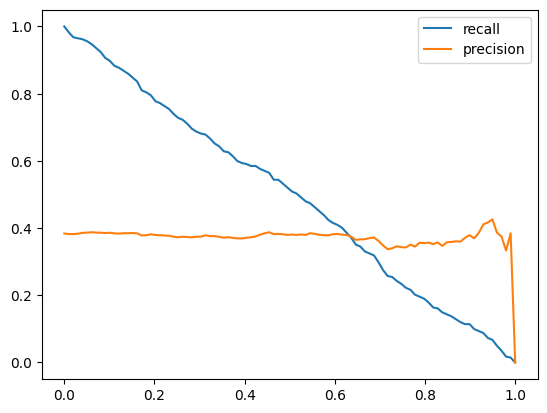

In [69]:
thresholds = np.linspace(start=0, stop = 1, num=100)
recalls = []
precisions = []
for thresh in thresholds:
    y_pred = data['predicted_proba'] > thresh
    recall_score = recall(y_true, y_pred)
    precision_score = precision(y_true, y_pred)
    recalls.append(recall_score)
    precisions.append(precision_score)

plt.figure()
plt.plot(thresholds, recalls, label='recall')
plt.plot(thresholds, precisions, label='precision')
plt.legend()
plt.show()

- Recall should decrease as thresholds increase, because it is harder for examples to be predicted as 1, therefore the number of False negatives willl increase
- Precision should increase as threshold increase, because it is harder for examples to be predicted as 1, therefore the number of true positives will increase, false positives should decrease

# F1 score
- $$ \frac{2P*R}{P+R}$$

In [71]:
y_true = data[label]
y_pred = data['predicted']
precision_s = precision(y_true, y_pred)
recall_s = recall(y_true, y_pred)
f1_score = (2* precision_s * recall_s) / (recall_s + precision_s)
f1_score

0.43866171003717475

In [73]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred)

0.43866171003717475

# Other common naming conventions for recall and precision
- True positive rate: Recall / Sensitivity
- False positive rate: $$\frac{fp}{tn + fp}$$ 
- (Note that this is not Precision)
- True negative rate: $$1-fpr$$ or $$\frac{tn}{tn+fp}$$
- 1 - False positive rate: True negative rate / Specificity

In [76]:
tpr = recall(y_true, y_pred)
tpr

0.5175438596491229

In [83]:
def true_positive_rate(y_true, y_pred):
    return recall(y_true, y_pred)

true_positive_rate(y_true, y_pred)

0.5175438596491229

In [78]:
# true negative rate
tn = ((y_true==0) & (y_pred==0)).sum()
fp = ((y_true==0) & (y_pred==1)).sum()
tnr = tn / (tn+fp)
tnr

0.47540983606557374

In [80]:
## false positive rate
fpr = 1- tnr
fpr

0.5245901639344263

In [81]:
# alternative calculation
fpr = fp / (fp+tn)
fpr

0.5245901639344263

In [84]:
def false_positive_rate(y_true, y_pred):
    fp = ((y_true==0) & (y_pred==1)).sum()
    tn = ((y_true==0) & (y_pred==0)).sum()
    return fp / (fp + tn)
false_positive_rate(y_true, y_pred)

0.5245901639344263

# AUC ROC 

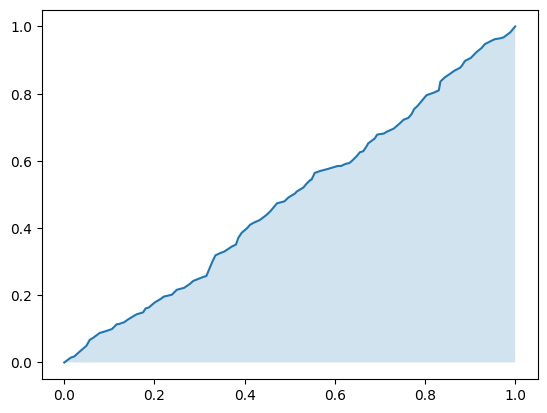

In [94]:
thresholds = np.linspace(start=0, stop=1, num=100)
tpr_s = []
fpr_s = []
for thresh in thresholds:
    y_pred = data['predicted_proba'] > thresh
    tpr = true_positive_rate(y_true, y_pred)
    fpr = false_positive_rate(y_true, y_pred)
    tpr_s.append(tpr)
    fpr_s.append(fpr)
plt.figure()
plt.plot(fpr_s, tpr_s, label='auc_roc')
plt.fill_between(fpr_s,tpr_s,alpha=0.2)

In [91]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_true, y_pred)

0.5

# LogLoss
- $$ LogLoss=-1.0 * (target *log(prediction) + (1- target) * log(1-prediction))$$
- Thus, our implementation is correct. Implementation of log loss is easy.
Interpretation may seem a bit difficult. You must remember that log loss penalizes
a lot more than other metrics

In [97]:
target = y_true
prediction = data['predicted_proba']
log_loss = -1 * (target * np.log(prediction) + (1-target) * np.log(1-prediction)).mean()
log_loss

1.050170499195288

In [102]:
from sklearn.metrics import log_loss
log_loss(target, prediction)

1.050170499195288

In [99]:
def log_loss(y_true, y_pred):
    log_loss = -1 * (y_true * np.log(y_pred) + (1- y_true) * np.log(1-y_pred)).mean()
    return log_loss

In [101]:
y_true = np.array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1])
y_proba = np.array([0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99])
log_loss(y_true, y_proba)

0.49882711861432294

# Multi class classification metrics